In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
data.duplicated().sum()

0

In [5]:
array=data.values

In [6]:
x=array[:,1:-1]
y=array[:,-1]
y=y.astype('int')
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [7]:
data["type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=20)

In [9]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(pred,y_test)

0.8387096774193549

In [10]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.94      0.88      0.91        17
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         0
           4       0.67      1.00      0.80         4
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      0.50      0.67         2

    accuracy                           0.84        31
   macro avg       0.61      0.63      0.60        31
weighted avg       0.84      0.84      0.83        31



# VISUALIZING THE CV RESULT

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train , y_train, cv=10)
    k_scores.append(scores.mean())
    print("k value = ",k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print(classification_report(y_test,pred))


k value =  1
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         4
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.97        31
   macro avg       0.86      0.79      0.81        31
weighted avg       1.00      0.97      0.98        31

k value =  3
              precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       1.00      1.00      1.00         4
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         

k value =  31
              precision    recall  f1-score   support

           1       0.75      0.88      0.81        17
           2       0.36      1.00      0.53         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2

    accuracy                           0.61        31
   macro avg       0.19      0.31      0.22        31
weighted avg       0.46      0.61      0.51        31

k value =  33
              precision    recall  f1-score   support

           1       0.75      0.88      0.81        17
           2       0.36      1.00      0.53         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2

    accuracy                           0.61      

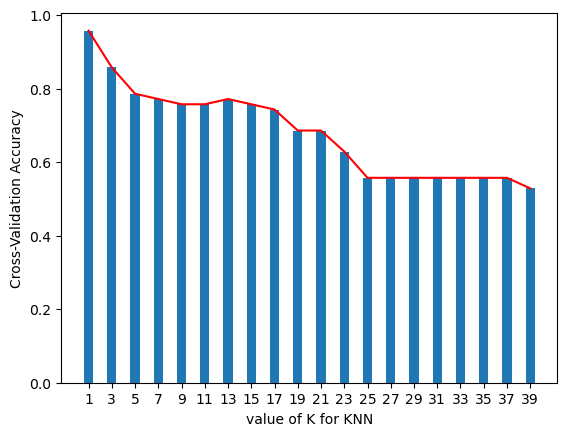

In [13]:
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color = "RED")
plt.xlabel('value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_range)
plt.show()

In [14]:
np.argmax(k_scores)

0

In [15]:
k_range[0]

1

In [16]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         4
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.97        31
   macro avg       0.86      0.79      0.81        31
weighted avg       1.00      0.97      0.98        31

